<a href="https://colab.research.google.com/github/gsabarinath02/Intrusion-Detection-using-ML-inproved/blob/main/IntDet_Multi_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# from google.colab import drive
# drive.mount('/content/drive')

In [77]:
col_names = ["A1","A2","A3","A4","A5",
    "A6","A7","A8","A9","A10","A11",
    "A12","A13","A14","A15","A16",
    "A17","A18","A19","A20",
    "A21","A22","A23","A24","A25",
    "A26","A27","A28","A29",
    "A30","A31","A32","A33",
    "A34","A35","A36",
    "A37","A38","A39",
    "A40","A41","A42","A43"]

In [78]:
dataset = pd.read_csv('/content/drive/MyDrive/Maths project/KDDcup1999_dataset.csv',header=None, names=col_names)
df=pd.DataFrame(dataset)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [79]:
p0=df['A42']
p0.value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
udpstorm              2
loadmodule            2
sqlattack             2
perl                  2
phf                   2
imap                  1
Name: A42, dtype: int64

<Figure size 1080x504 with 0 Axes>

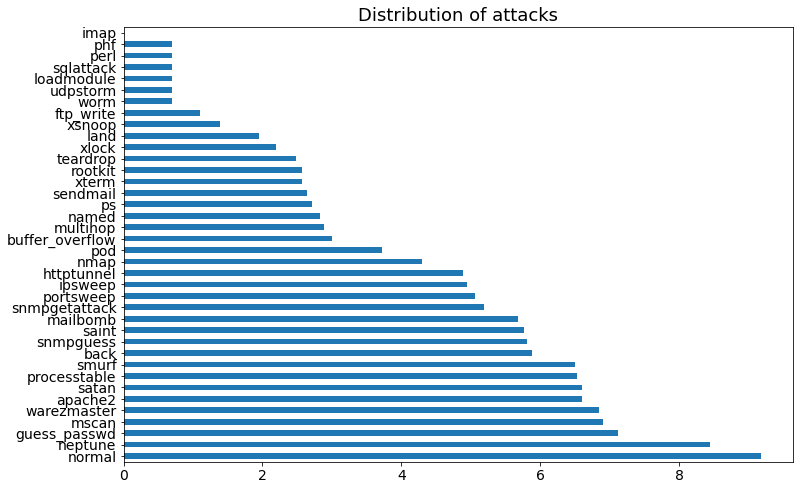

In [80]:
import matplotlib
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
df['A42'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [81]:
# changing attack labels to their respective attack class
# def change_label(df):
#   df.A42.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
#   df.A42.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
#        'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
#   df.A42.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
#   df.A42.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [82]:
# calling change_label() function
# change_label(df)

In [83]:
# distribution of attack classes
# df.A42.value_counts()

In [84]:
# plt.figure(figsize=(8,8))
# plt.pie(df.A42.value_counts(),labels=df.A42.unique(),autopct='%0.2f%%')
# plt.title("Pie chart distribution of normal and abnormal labels")
# plt.legend()
# #plt.savefig('plots/Pie_chart_binary.png')
# plt.show()

In [85]:
from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()
df['A42']=number.fit_transform(df['A42'].astype('str'))
target=df.iloc[:,41].values
print(target)
df=df.drop(['A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20','A21','A22','A43','A42'],axis=1)

[14 14 16 ...  1 16 11]


In [86]:
# appanding the data to the data frame
df['target']=target
df

,A1,A2,A3,A4,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,tcp,private,REJ,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
1,0,tcp,private,REJ,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
2,2,tcp,ftp_data,SF,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16
3,0,icmp,eco_i,SF,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24
4,1,tcp,telnet,RSTO,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16
22540,0,tcp,http,SF,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16
22541,0,tcp,http,SF,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,udp,domain_u,SF,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16


In [87]:
df['target'].value_counts()

16    9711
14    4657
4     1231
11     996
33     944
0      737
25     735
21     685
27     665
1      359
29     331
24     319
10     293
28     178
20     157
7      141
5      133
15      73
19      41
2       20
12      18
13      17
22      15
26      14
37      13
23      13
31      12
35       9
8        7
36       4
3        3
34       2
18       2
17       2
9        2
32       2
30       2
6        1
Name: target, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['A2']=number.fit_transform(df['A2'].astype('str'))
target1=df.iloc[:,1].values
print(target1)

[1 1 1 ... 1 2 1]


In [89]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['A3']=number.fit_transform(df['A3'].astype('str'))
target2=df.iloc[:,2].values
print(target2)

[45 45 19 ... 22 11 52]


In [90]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['A4']=number.fit_transform(df['A4'].astype('str'))
target3=df.iloc[:,3].values
print(target3)
df=df.drop(['A2','A3','A4'],axis=1)

[1 1 9 ... 9 9 1]


In [91]:
df.insert(1,'A2pp',target1)
df.insert(2,'A3pp',target2)
df.insert(3,'A4pp',target3)
df

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,1,45,1,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
1,0,1,45,1,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14
2,2,1,19,9,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16
3,0,0,13,9,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24
4,1,1,55,2,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16
22540,0,1,22,9,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16
22541,0,1,22,9,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,2,11,9,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16


In [92]:
df_target = df.pop('target')
df_target

0        14
1        14
2        16
3        24
4        11
         ..
22539    16
22540    16
22541     1
22542    16
22543    11
Name: target, Length: 22544, dtype: int64

In [93]:
for i in range(0,len(df_target)):
    if (df_target[i]== 14 or df_target[i]==1 or df_target[i]==27 or df_target[i]==10 or df_target[i]==31 or df_target[i]==0 or df_target[i]==21 or df_target[i]==18 or df_target[i]==8):
        df_target[i]=0
    elif df_target[i]== 16:
        df_target[i]=1
    elif (df_target[i]== 2 or df_target[i]==34 or df_target[i]==30 or df_target[i]==23 or df_target[i]==22 or df_target[i]==37 or df_target[i]==32):
        df_target[i]=4
    elif (df_target[i]== 7 or df_target[i]==15 or df_target[i]==20 or df_target[i]==25 or df_target[i]==11 or df_target[i]==24):
        df_target[i]=2
    else:
        df_target[i]=3
df_target

0        0
1        0
2        1
3        2
4        2
        ..
22539    1
22540    1
22541    0
22542    1
22543    2
Name: target, Length: 22544, dtype: int64

In [94]:
df['target']=df_target
df

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,1,45,1,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,2
4,1,1,55,2,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0,1,22,9,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1
22541,0,1,22,9,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0
22542,0,2,11,9,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1


In [95]:
df['target'].value_counts()

1    9711
0    7417
3    2928
2    2421
4      67
Name: target, dtype: int64

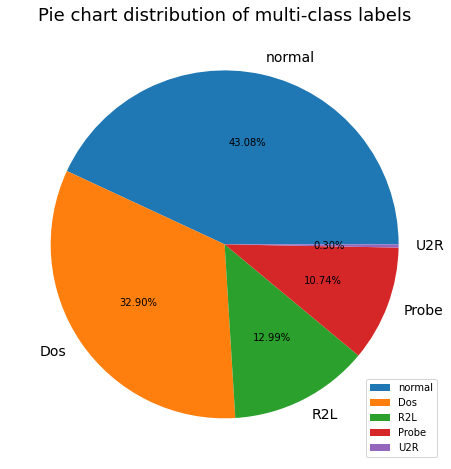

In [96]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(df.target.value_counts(),labels=['normal','Dos','R2L','Probe','U2R'],autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
#plt.savefig('plots/Pie_chart_binary.png')
plt.show()

In [97]:
# import matplotlib
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d

# plt.clf()
# plt.figure(figsize=(12,8))
# params = {'axes.titlesize':'18',
#           'xtick.labelsize':'14',
#           'ytick.labelsize':'14'}
# matplotlib.rcParams.update(params)
# plt.title('Distribution of attacks')
# #df.plot(kind='barh')
# df.target.value_counts().apply(np.log).plot(kind='barh').labels=['normal','Dos','R2L','Probe','U2R'],
# plt.show()


In [98]:
df1=df
df1

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,target
0,0,1,45,1,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,2
4,1,1,55,2,0,15,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0,1,22,9,317,938,1,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1
22541,0,1,22,9,54540,8314,1,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0
22542,0,2,11,9,42,42,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1


In [99]:
df_target = df1.pop('target')
p0=df1.replace({'A1':0,'A5':0,'A6':0,'A12':0,'A25':0,'A26':0,'A31':0,'A36':0,'A37':0,'A38':0,'A39':0,'A23':0,'A24':0,'A29':0,'A30':0,'A32':0,'A33':0,'A34':0,'A35':0,'A40':0,'A41':0},np.nan)
df_int=p0.interpolate()
df_int=df_int.replace({np.nan:0})
df_int

,A1,A2pp,A3pp,A4pp,A5,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41
0,0.0,1,45,1,0.0,0.0,0.0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.060000,0.00,255.0,10.0,0.040,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
1,0.0,1,45,1,0.0,0.0,0.0,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.060000,0.00,255.0,1.0,0.325,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
2,2.0,1,19,9,12983.0,0.0,0.0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.060909,0.00,134.0,86.0,0.610,0.040000,0.61,0.02,0.00,0.0,0.943333,0.903333
3,1.5,0,13,9,20.0,0.0,0.0,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.061818,1.00,3.0,57.0,1.000,0.105000,1.00,0.28,0.00,0.0,0.886667,0.806667
4,1.0,1,55,2,143.5,15.0,0.0,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.062727,0.75,29.0,86.0,0.310,0.170000,0.03,0.02,0.00,0.0,0.830000,0.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,1,49,9,794.0,333.0,1.0,1.0,1.0,1.0,1.00,0.0,0.0,1.00,0.462857,0.18,100.0,141.0,0.720,0.060000,0.01,0.01,0.01,1.0,0.165000,0.442000
22540,1.0,1,22,9,317.0,938.0,1.0,2.0,11.0,1.0,1.00,0.0,0.0,1.00,0.597143,0.18,197.0,255.0,1.000,0.043333,0.01,0.01,0.01,1.0,0.117500,0.256000
22541,1.0,1,22,9,54540.0,8314.0,1.0,5.0,10.0,1.0,1.00,0.0,0.0,1.00,0.731429,0.20,255.0,255.0,1.000,0.026667,0.01,0.01,0.01,1.0,0.070000,0.070000
22542,1.0,2,11,9,42.0,42.0,1.0,4.0,6.0,1.0,1.00,0.0,0.0,1.00,0.865714,0.33,255.0,252.0,0.990,0.010000,0.01,0.01,0.01,1.0,0.255000,0.535000


In [100]:
df_norm = df_int
cols_to_norm = ['A1','A2pp','A3pp','A4pp','A5','A6','A23','A24','A32','A33']
df_norm[cols_to_norm] = df_norm[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min()))
#df_target = df_norm.pop('target')
df_norm=df_norm.drop(['A5'],axis=1)
df_norm

,A1,A2pp,A3pp,A4pp,A6,A12,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41
0,0.000000,0.5,0.714286,0.1,0.000000,0.0,0.447059,0.017647,0.0,0.00,1.0,1.0,0.04,0.060000,0.00,1.000000,0.035433,0.040,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000,0.0,0.264706,0.000000,0.0,0.00,1.0,1.0,0.01,0.060000,0.00,1.000000,0.000000,0.325,0.060000,0.00,0.00,0.00,0.0,1.000000,1.000000
2,0.000035,0.5,0.301587,0.9,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,1.00,0.060909,0.00,0.523622,0.334646,0.610,0.040000,0.61,0.02,0.00,0.0,0.943333,0.903333
3,0.000026,0.0,0.206349,0.9,0.000000,0.0,0.000000,0.125490,0.0,0.00,0.0,0.0,1.00,0.061818,1.00,0.007874,0.220472,1.000,0.105000,1.00,0.28,0.00,0.0,0.886667,0.806667
4,0.000017,0.5,0.873016,0.2,0.000011,0.0,0.000000,0.013725,0.0,0.12,1.0,0.5,1.00,0.062727,0.75,0.110236,0.334646,0.310,0.170000,0.03,0.02,0.00,0.0,0.830000,0.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000017,0.5,0.777778,0.9,0.000247,1.0,0.000000,0.000000,1.0,1.00,0.0,0.0,1.00,0.462857,0.18,0.389764,0.551181,0.720,0.060000,0.01,0.01,0.01,1.0,0.165000,0.442000
22540,0.000017,0.5,0.349206,0.9,0.000697,1.0,0.001961,0.019608,1.0,1.00,0.0,0.0,1.00,0.597143,0.18,0.771654,1.000000,1.000,0.043333,0.01,0.01,0.01,1.0,0.117500,0.256000
22541,0.000017,0.5,0.349206,0.9,0.006177,1.0,0.007843,0.017647,1.0,1.00,0.0,0.0,1.00,0.731429,0.20,1.000000,1.000000,1.000,0.026667,0.01,0.01,0.01,1.0,0.070000,0.070000
22542,0.000017,1.0,0.174603,0.9,0.000031,1.0,0.005882,0.009804,1.0,1.00,0.0,0.0,1.00,0.865714,0.33,1.000000,0.988189,0.990,0.010000,0.01,0.01,0.01,1.0,0.255000,0.535000


In [157]:
from sklearn.model_selection import train_test_split

indepX = df_norm
depY = df_target
indepX_train , indepX_test  , depY_train  , depY_test = train_test_split(indepX ,depY ,test_size = .35, random_state=42)

In [158]:
from sklearn.decomposition import PCA

pca = PCA(n_components=17)
indepX_train = pca.fit_transform(indepX_train)
indepX_test = pca.transform(indepX_test)

variance = pca.explained_variance_ratio_
print(variance)

[0.32788848 0.13566715 0.07775994 0.06778035 0.06515754 0.05051504
 0.04608014 0.03759663 0.03416616 0.0228653  0.02221231 0.0196321
 0.01780301 0.0167898  0.01332219 0.01183448 0.01091141]


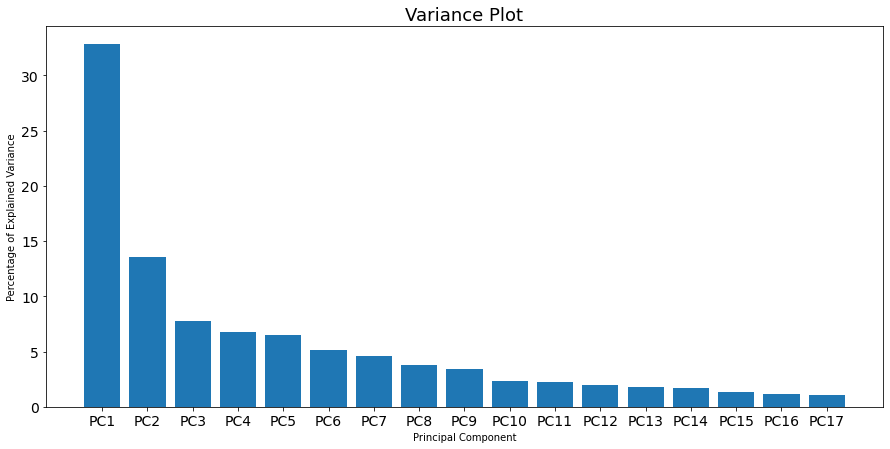

17

In [159]:
# # Visualizer Size
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 7]

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Visualize Bar Plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Variance Plot')
plt.show()
pca.n_components_

In [160]:
from sklearn.svm import SVC
import time

start_time = time.time()

KSVM = SVC(kernel='rbf' ,C=1000, gamma = 0.1, max_iter=-1)
KSVM.fit(indepX_train , depY_train)
depY_train_pred = KSVM.predict(indepX_train)
depY_test_pred = KSVM.predict(indepX_test)

end_time = time.time()
total_time = end_time - start_time

print("execution Time in seconds: ", total_time)


execution Time in seconds:  13.907809495925903


In [161]:
print ( (  depY_train_pred == depY_train).sum() , depY_train.shape[0]   )
print ( (depY_test_pred  ==   depY_test).sum()  , depY_test.shape[0]    )

14212 14653
7369 7891


In [162]:
from sklearn.metrics import accuracy_score

print("The accuracy of test data: ",accuracy_score( depY_test, depY_test_pred ))
print("The accuracy of training data: ",accuracy_score( depY_train, depY_train_pred ))

The accuracy of test data:  0.9338486883791661
The accuracy of training data:  0.9699037739712004


In [163]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(depY_test, depY_test_pred)

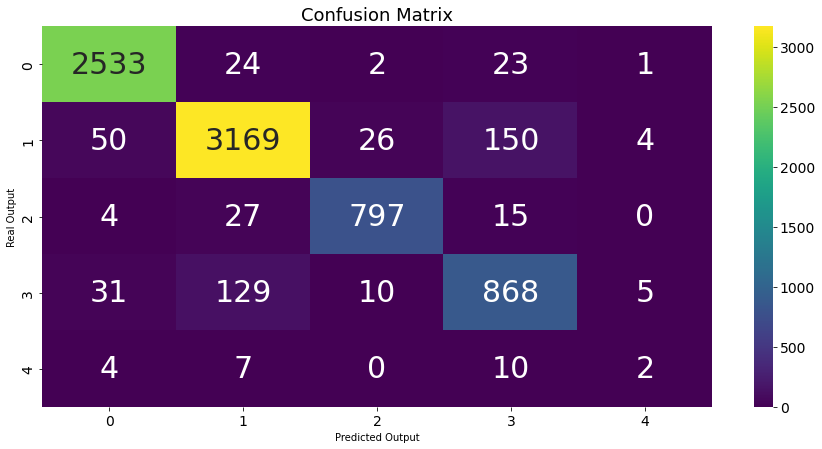

In [164]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30},cmap="viridis", fmt='d', ax = ax)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Output')
plt.ylabel('Real Output')
plt.show()

In [165]:
from sklearn.metrics import classification_report

print(classification_report(depY_test, depY_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2583
           1       0.94      0.93      0.94      3399
           2       0.95      0.95      0.95       843
           3       0.81      0.83      0.82      1043
           4       0.17      0.09      0.11        23

    accuracy                           0.93      7891
   macro avg       0.77      0.76      0.76      7891
weighted avg       0.93      0.93      0.93      7891

